In [2]:
import numpy as np
import matplotlib.pyplot as plt

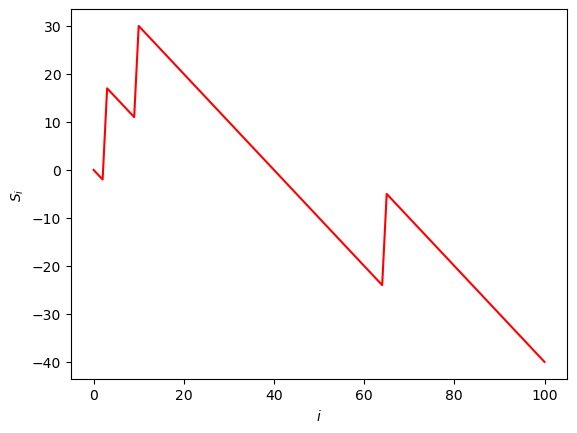

In [10]:
# Make the first figure of the CUSUM process.

from scipy.stats import bernoulli

n = 20 # upward step size + 1
q_0 = 1 / n

n_iter = 100

# Generate n_iter number of Bernoulli random variables representing the state (defective = 0 or satisfactory = 1)
# of n_iter number of products.
u = bernoulli.rvs(q_0, size = n_iter)

# Calculate the score contributions for each product.
x = np.zeros(n_iter)
x = n * u - 1

S = np.zeros(n_iter + 1) # An array to hold the values of the original score S.

for i in range(n_iter):
    
    # Compute the next value of the score S.
    S[i + 1] = S[i] + x[i]


plt.plot([i for i in range(n_iter + 1)], S, '-r')
plt.xlabel(r'$i$')    
plt.ylabel(r'$S_i$')

plt.show()

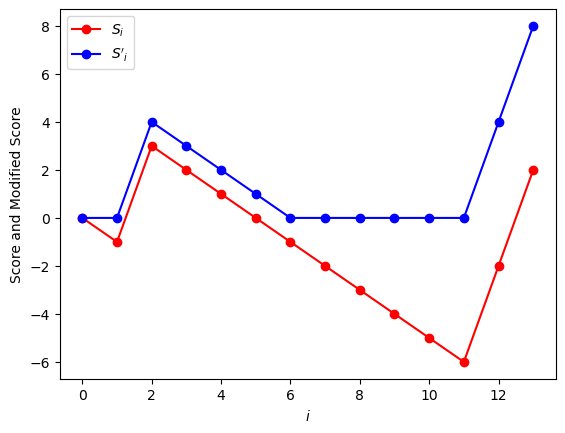

In [14]:
# Make the second figure of the CUSUM process.

from scipy.stats import bernoulli

# With these numbers, we have ARL = 21.6.
n = 5 # upward step size + 1
q_0 = 1 / n
h = 8

n_iter = 1000

# Generate n_iter number of Bernoulli random variables representing the state (defective = 0 or satisfactory = 1)
# of n_iter number of products.
u = bernoulli.rvs(q_0, size = n_iter)

# Calculate the score contributions for each product.
x = np.zeros(n_iter)
x = n * u - 1

i = 0
S = np.zeros(n_iter) # An array to hold the values of the original score S.
S_p = np.zeros(n_iter) # An array to hold the values of the modified score S'.
t_hit = None # This variable will be updated to the time when S' hits the value h, if it happens within n_iter steps.
S_min = 0 # variable to hold the minimum value of S. 

while ((i < n_iter - 1) and (t_hit is None)):
    
    # Compute the next value of the score S.
    S[i + 1] = S[i] + x[i]
    
    if S[i + 1] < S_min:
        S_min = S[i + 1]
    
    # Compute the next value of the modified score S'.
    if S_p[i] + x[i] >= h:
        S_p[i + 1] = h
    elif S_p[i] + x[i] < 0:
        S_p[i + 1] = 0
    else:
        S_p[i + 1] = S_p[i] + x[i]
    
    
    if S_p[i + 1] == h:
        t_hit = i + 1
        
    i += 1
    

if t_hit is None:
    t_hit = n_iterations - 1
       
#print(S[t_hit] - S_min)    

plt.plot(S[:t_hit + 1], '-or', S_p[:t_hit + 1], '-ob')
plt.xlabel(r'$i$')    
plt.ylabel('Score and Modified Score')
plt.legend([r'$S_i$', r"$S'_i$"])

plt.show()